In [ ]:
import pandas as pd
fraud = pd.read_csv('Fraud_check.csv')
col = ['Undergrad','Marital.Status','City.Population','Work.Experience','Urban','Taxable.Income']
fraud =fraud[col]
for i in range(0,len(fraud['Urban'])):
    if fraud.iloc[i,5] > 30000:
        fraud.iloc[i,5] = 'Good'
    else:
        fraud.iloc[i,5] = 'Risky'
fraud

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [ ]:
copy = fraud.copy()
copy['Undergrad'] = copy['Undergrad'].map({'YES':1,'NO':0})
copy['Urban'] = copy['Urban'].map({'YES':1,'NO':0})
copy['Marital.Status'] = copy['Marital.Status'].map({'Single':0,'Married':1,'Divorced':2})
copy['Taxable.Income'] = copy['Taxable.Income'].map({'Good':1,'Risky':0})
copy

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
0,0,0,50047,10,1,1
1,1,2,134075,18,1,1
2,0,1,160205,30,1,1
3,1,0,193264,15,1,1
4,0,1,27533,28,0,1
...,...,...,...,...,...,...
595,1,2,39492,7,1,1
596,1,2,55369,2,1,1
597,0,2,154058,0,1,1
598,1,1,180083,17,0,1


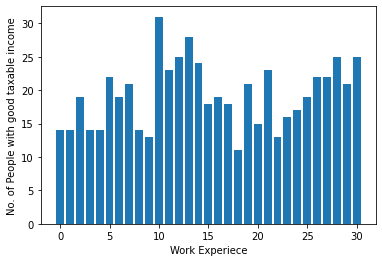

In [ ]:
import numpy as np

listt = []
for i in np.sort(fraud['Work.Experience'].unique()):
    x = fraud['Work.Experience'].value_counts()[i]
    listt.append(x)
plt.bar(np.sort(fraud['Work.Experience'].unique()),listt)
plt.xlabel('Work Experiece')
plt.ylabel('No. of People with good taxable income')
plt.show()

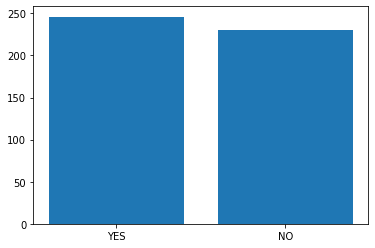

78.84615384615384 % of Undergrads have good taxable income
79.86111111111111 % of non undergrads have good taxable income
51.680672268907564 % of people with good taxable income are undergrads


In [ ]:
import matplotlib.pyplot as plt

x = ['YES','NO']
y = fraud[fraud['Taxable.Income']=='Good']['Undergrad'].value_counts()
percent = copy[copy['Undergrad']==1]['Taxable.Income'].sum()*100/len(copy[copy['Undergrad']==1]['Taxable.Income'])
perc = copy[copy['Undergrad']==0]['Taxable.Income'].sum()*100/len(copy[copy['Undergrad']==0]['Taxable.Income'])
percentage = copy[copy['Taxable.Income']==1]['Undergrad'].sum()*100/len(copy[copy['Taxable.Income']==1]['Undergrad'])
plt.bar(x,y,)
plt.show()
print(percent,'% of Undergrads have good taxable income')
print(perc,'% of non undergrads have good taxable income')
print(percentage,'% of people with good taxable income are undergrads')

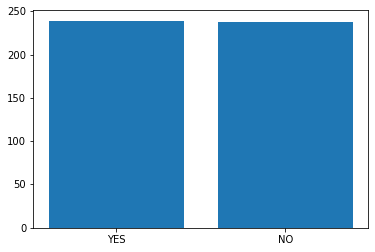

79.13907284768212 % of Urban population have good taxable income
79.53020134228188 % of non urban population have good taxable income
50.21008403361345 % of people with good taxable income are from Urban area


In [ ]:
import matplotlib.pyplot as plt

x = fraud[fraud['Taxable.Income']=='Good']['Urban'].unique()
y = fraud[fraud['Taxable.Income']=='Good']['Urban'].value_counts()
percent = copy[copy['Urban']==1]['Taxable.Income'].sum()*100/len(copy[copy['Urban']==1]['Taxable.Income'])
perc = copy[copy['Urban']==0]['Taxable.Income'].sum()*100/len(copy[copy['Urban']==0]['Taxable.Income'])
percentage = copy[copy['Taxable.Income']==1]['Urban'].sum()*100/len(copy[copy['Taxable.Income']==1]['Urban'])
plt.bar(x,y)
plt.show()
print(percent,'% of Urban population have good taxable income')
print(perc,'% of non urban population have good taxable income')
print(percentage,'% of people with good taxable income are from Urban area')


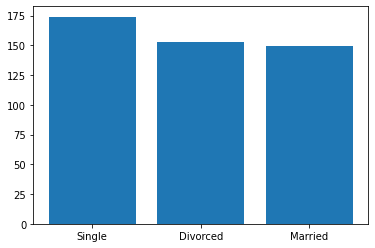

76.80412371134021 % of divorced people have good taxable income
80.18433179723502 % of singles have good taxable income
80.95238095238095 % of married have good taxable income
Single      36.554622
Divorced    32.142857
Married     31.302521
Name: Marital.Status, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

x = fraud[fraud['Taxable.Income']=='Good']['Marital.Status'].unique()
y = fraud[fraud['Taxable.Income']=='Good']['Marital.Status'].value_counts()
percent = copy[copy['Marital.Status']==1]['Taxable.Income'].sum()*100/len(copy[copy['Marital.Status']==1]['Taxable.Income'])
perc = copy[copy['Marital.Status']==0]['Taxable.Income'].sum()*100/len(copy[copy['Marital.Status']==0]['Taxable.Income'])
p = copy[copy['Marital.Status']==2]['Taxable.Income'].sum()*100/len(copy[copy['Marital.Status']==2]['Taxable.Income'])
percentage = fraud[fraud['Taxable.Income']=='Good']['Marital.Status'].value_counts()*100/len(fraud[fraud['Taxable.Income']=='Good']['Marital.Status'])
plt.bar(x,y)
plt.show()
print(percent,'% of divorced people have good taxable income')
print(perc,'% of singles have good taxable income')
print(p,'% of married have good taxable income')
print(percentage)

In [ ]:
import matplotlib.pyplot as plt

x = fraud[fraud['Taxable.Income']=='Good']['Urban'].unique()
y = fraud[fraud['Taxable.Income']=='Good']['Urban'].value_counts()
plt.bar(x,y)
plt.show()


In [ ]:
x= copy.drop('Taxable.Income',axis = 1)
y = copy['Taxable.Income']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RF
model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(xtrain,ytrain)
prediction = model.predict(x)

In [ ]:
copy['prediction'] = prediction
fraud['prediction'] = prediction
fraud['prediction'] = fraud['prediction'].map({0:'Good',1:'Risky'})
fraud

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income,prediction
0,NO,Single,50047,10,YES,Good,Good
1,YES,Divorced,134075,18,YES,Good,Risky
2,NO,Married,160205,30,YES,Good,Good
3,YES,Single,193264,15,YES,Good,Good
4,NO,Married,27533,28,NO,Good,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good,Good
596,YES,Divorced,55369,2,YES,Good,Good
597,NO,Divorced,154058,0,YES,Good,Good
598,YES,Married,180083,17,NO,Good,Good


In [ ]:
eficay = (len(copy['Taxable.Income']) - sum(abs(copy['prediction']-copy['Taxable.Income'])))*100/len(copy['Taxable.Income'])
print('This Model is ',eficay,'% efficient')

This Model is  94.33333333333333 % efficient
